<a href="https://colab.research.google.com/github/freemind988/WANG/blob/master/class08_hw6_%E7%8E%8B%E5%85%83%E6%81%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **讀取資料**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class08/drug200.csv")
drug = data
data.head(5)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
x = data.iloc[:,:-1]
y = np.array(data.iloc[:,-1:])
dummy_x = pd.get_dummies(x)
dummy_x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [4]:
from sklearn.model_selection import train_test_split
dummy_x = np.array(dummy_x)
train_x, test_x, train_y, test_y = train_test_split(dummy_x, y, test_size=0.2, random_state=10)

print(f"train_x shape:  {train_x.shape}")
print(f"test_x shape: {test_x.shape}")

train_x shape:  (160, 9)
test_x shape: (40, 9)


## **搭建模型**

In [5]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=10)

## **訓練模型**

In [6]:
dc.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

## **評估模型**

In [7]:
from sklearn import metrics
y_pred = dc.predict(test_x)  # 用test x找Y hat
print("DecisionTree Accuracy: ", metrics.accuracy_score(test_y, y_pred))

DecisionTree Accuracy:  1.0


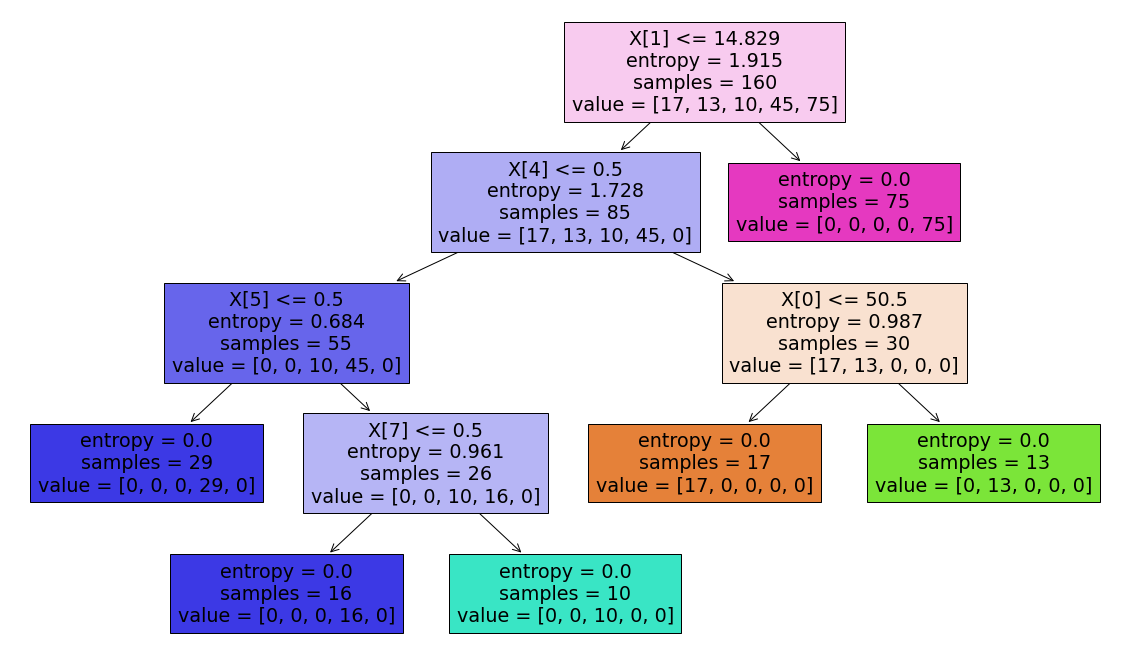

In [8]:
from sklearn import tree
# tree.plot_tree(dc, feature_names=train_x.columns, class_names=train_y.classes_)
fig, ax = plt.subplots(figsize=(20,12))
tree.plot_tree(dc)
tree.plot_tree(dc, ax=ax, filled=True);

In [17]:
# print(train_x)
# print(train_y)

fig= plt.figure(figsize=(15,10), dpi=50)
tree.plot_tree(dc, ax=ax);


findfont: Font family ['jf-openhuninn-1.0'] not found. Falling back to DejaVu Sans.


<Figure size 750x500 with 0 Axes>

In [33]:
f_name=["Age","Na_to_K","Sex_F","Sex_M","BP_HIGH","BP_LOW","BP_NORMAL","Cholesterol_HIGH","Cholesterol_NORMAL"]
c_name=["drugA","drugB","drugC","drugX","drugY"]

from sklearn.tree import export_graphviz
import graphviz
kktree=tree.export_graphviz(dc,
          out_file="c:\\tree.dot",
          feature_names = f_name, 
          class_names = c_name,
          filled=True,
          rounded=True,   # 是否根據Target來填顏色)
          proportion=False, # 顯示target的數量(非百分比)
          precision=2    # 小數點後第二位
        )

graph = graphviz.Source(kktree)
fig.savefig('imagename.png')
#graph
plt.show(graph)

In [30]:
text_representation = tree.export_text(dc)
print(text_representation)

|--- feature_1 <= 14.83
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: drugX
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: drugC
|   |--- feature_4 >  0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: drugB
|--- feature_1 >  14.83
|   |--- class: drugY

